In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import pickle


In [3]:
path = 'SDSS_DR16_90cutoff_for_Vicky.csv'
df = pd.read_csv(path)
df


,Unnamed: 0,specObjID,ra,dec,z,zErr,Types,d4000_n,sigmaStars,fracDeV_r,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z
0,0,2795715636188178432,162.87876,16.838215,0.022297,0.000007,elliptical,1.939160,128.97870,1.000000,17.35997,15.50984,14.68634,14.30167,14.01772
1,1,2840803871343798272,240.39499,11.850668,0.053161,0.000011,elliptical,1.944695,183.85820,0.935781,19.15590,17.14306,16.24167,15.81783,15.50098
2,2,2800218136303921152,164.66952,16.900165,0.068568,0.000009,spiral,1.282932,81.20707,0.420175,18.36842,17.18698,16.64672,16.31816,16.09746
3,3,2800232155077175296,164.85617,16.979098,0.083634,0.000019,spiral,1.565293,97.63731,0.170645,18.47494,17.25055,16.64057,16.32310,16.13419
4,4,2849703318459017216,245.52298,10.278617,0.128543,0.000025,spiral,1.453489,219.17930,0.478295,19.32188,17.80865,17.02585,16.56203,16.39108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525335,583519,2795713986920736768,162.43700,17.284938,0.056785,0.000006,spiral,1.123235,98.59753,0.000000,19.50647,17.86611,17.53326,17.20054,17.99106
525336,583520,2916209471627749376,155.78431,15.811398,0.145377,0.000023,elliptical,1.496544,148.20890,1.000000,20.09706,18.75447,17.76428,17.33186,17.03715
525337,583522,2920722966893324288,159.56049,16.508320,0.178770,0.000020,spiral,1.549078,91.99490,0.407970,19.59916,18.35870,17.55004,17.16154,17.01065
525338,583523,2792375044968310784,161.67263,16.703673,0.056509,0.000008,spiral,1.398121,83.41415,0.282227,19.66740,18.04996,17.17682,16.70945,16.39195


In [9]:
Types = df.loc[0:1000, 'Types']
types = Types.apply(lambda v: v.replace(
    'elliptical', '1').replace('spiral', '0')).astype(int)
y = np.array(types)

X = np.array(df.loc[0:1000, 'petroMag_u':'petroMag_z'])
# u, g, r, i, z band 0, 1, 2, 3, 4
ug = X[:, [0, 1]]
ur = X[:, [0, 2]]
ui = X[:, [0, 3]]
uz = X[:, [0, 4]]
gr = X[:, [1, 2]]
gi = X[:, [1, 3]]
gz = X[:, [1, 4]]
ri = X[:, [2, 3]]
rz = X[:, [2, 4]]
iz = X[:, [3, 4]]

cmap = 'tab20'


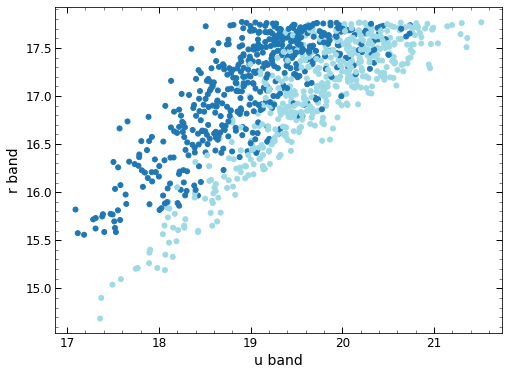

In [4]:
# plot ur band graph

plt.figure(figsize=(8, 6), facecolor='none')
plt.scatter(ur[:, 0], ur[:, 1], c=y, cmap=cmap, s=25)

plt.xlabel('u band', fontsize='14')
plt.ylabel('r band', fontsize='14')
plt.minorticks_on()
plt.tick_params(which='both', labelsize='12',
                direction='in', top='1', right='1')
plt.tick_params(which='major',  length=6, width=1)
plt.tick_params(which='minor',  length=3, width=0.5)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(ur, y, random_state=42)

In [6]:
# Linear SVC Model
# Create a pipeline
clf_linSVC = Pipeline([
    ("linear_svc", LinearSVC(C=10000, loss="hinge", max_iter=1000000000))
])

# Train the model
clf_linSVC.fit(X_train, y_train)

# Evaluate the model's accuracy
print("Train set accuracy = " + str(clf_linSVC.score(X_train, y_train)))
print("Test set accuracy = " + str(clf_linSVC.score(X_test, y_test)))


Train set accuracy = 0.8293333333333334
Test set accuracy = 0.8207171314741036


c:\Users\hikaru\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train set accuracy = 0.8293333333333334

Test set accuracy = 0.8207171314741036

In [12]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:, 0].min() - 10*h, X[:, 0].max() + 10*h
    y_min, y_max = X[:, 1].min() - 10*h, X[:, 1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, s=25)  # Data points

    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.2)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines

    plt.xlabel('u band', fontsize='14')
    plt.ylabel('r band', fontsize='14')
    plt.minorticks_on()
    plt.tick_params(which='both', labelsize='12',
                    direction='in', top='1', right='1')
    plt.tick_params(which='major',  length=6, width=1)
    plt.tick_params(which='minor',  length=3, width=0.5)


In [8]:
# save train-test linear data
clf_lin_2band_save = open('clf_lin_2band.csv', 'wb')
pickle.dump(clf_linSVC, clf_lin_2band_save)
clf_lin_2band_save.close()


In [9]:
clf_lin_2band_read = open('clf_lin_2band.csv', 'rb')
clf_lin_2band_file = pickle.load(clf_lin_2band_read)


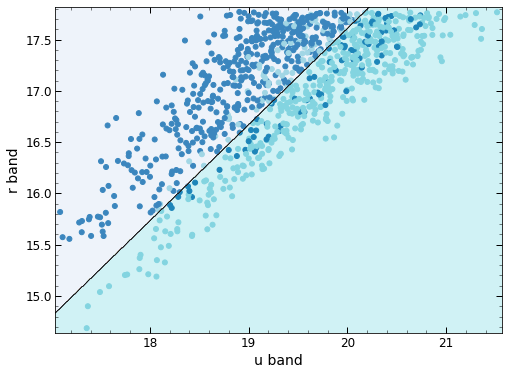

In [10]:
plot_decision_boundary(clf_lin_2band_file, ur, y)


low C = อนุญาติให้ data ปนกันน้อย

high C = อนุญาติให้ data ปนกันมาก ,ไม่ค่อยเข้มงวดในการแบ่ง

low gamma = เส้นแบ่งหยักน้อย

high gamma = เส้นแบ่งหยักมาก

In [5]:
# RBF Kernel Model
# Create a pipeline
def rbf_svc(X_train, X_test, y_train, y_test, C, gamma, x):
    clf_rbfSVC = Pipeline([
        ("rbf_svc", SVC(kernel="rbf", C=C, gamma=gamma))
    ])

    # Train the model
    clf_rbfSVC.fit(X_train, y_train)

    # Evaluate the model's accuracy
    print('C = ' + str(C) + ', ' + 'gamma = ' + str(gamma))
    print("Train set accuracy = " + str(clf_rbfSVC.score(X_train, y_train)))
    print("Test set accuracy = " + str(clf_rbfSVC.score(X_test, y_test)))
    plot_decision_boundary(clf_rbfSVC, x, y)


C = 50, gamma = 2
Train set accuracy = 0.8346666666666667
Test set accuracy = 0.8207171314741036


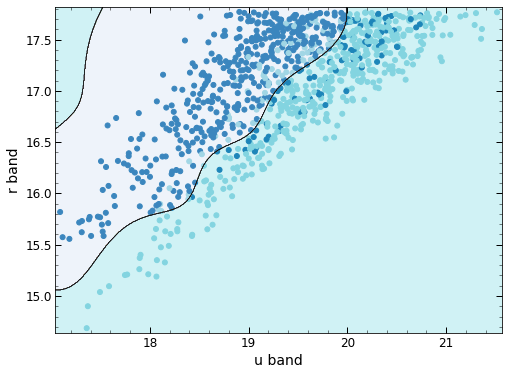

In [12]:
rbf_svc(X_train, X_test, y_train, y_test, 50, 2, ur)


In [16]:
C_range = np.logspace(0, 10, 11)
gamma_range = np.logspace(-8, 2, 11)

In [13]:
# RBF Kernel loop version
clf_list = []

for C in C_range:
    for gamma in gamma_range:
        clf_rbfSVC = Pipeline(
            [("rbf_svc", SVC(kernel="rbf", C=C, gamma=gamma))])

        clf_rbfSVC.fit(X_train, y_train)

        train = clf_rbfSVC.score(X_train, y_train)
        test = clf_rbfSVC.score(X_test, y_test)
        clf_list += [(C, gamma, train, test, clf_rbfSVC)]


In [ ]:
# save train-test rbf data
clf_rbf_2band_save = open('clf_rbf_2band.csv', 'wb')
pickle.dump(clf_list, clf_rbf_2band_save)
clf_rbf_2band_save.close()


In [2]:
clf_rbf_2band_read = open('clf_rbf_2band.csv', 'rb')
clf_rbf_2band_file = pickle.load(clf_rbf_2band_read)


In [3]:
# max test set

POS = 3
clf_max = (0, 0, 0, 0, 0)

for clf in clf_rbf_2band_file:
    if clf_max[POS] < clf[POS]:
        clf_max = clf

C_max = clf_max[0]
gamma_max = clf_max[1]
train_max = clf_max[2]
test_max = clf_max[3]

print('C = ' + str(C_max) + ', ' + 'gamma = ' + str(gamma_max))
print("Train set accuracy = " + str(train_max))
print("Test set accuracy = " + str(test_max))


C = 100.0, gamma = 1.0
Train set accuracy = 0.8306666666666667
Test set accuracy = 0.8406374501992032


C = 100.0, gamma = 1.0

Train set accuracy = 0.8306666666666667

Test set accuracy = 0.8406374501992032

C = 100.0, gamma = 1.0
Train set accuracy = 0.8306666666666667
Test set accuracy = 0.8406374501992032


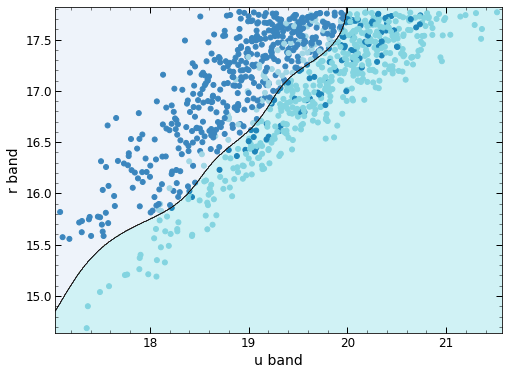

In [13]:
rbf_svc(X_train, X_test, y_train, y_test, C_max, gamma_max, ur)


In [14]:
from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [17]:
# clf_file = [(C1, gamma1, train1, test1, clf1), (C2, gamma2, train2, test2, clf2), (C3, gamma3, train3, test3, clf3),...]
# *clf_file = (C1, gamma1, train1, test1, clf1) (C2, gamma2, train2, test2, clf2) (C3, gamma3, train3, test3, clf3)...
# zip(*clf_file) = (C1, C2, C3,...), (gamma1, gamma2, gamma3,...), (train1, train2, train3,...), (test1, test2, test3,...), (clf1, clf2, clf3,...) --> อ่านไม่ได้เลยต้องใส่ list

tp = list(zip(*clf_rbf_2band_file))
test_array = np.array(tp[3])
test_grid = test_array.reshape(len(C_range), len(gamma_range))


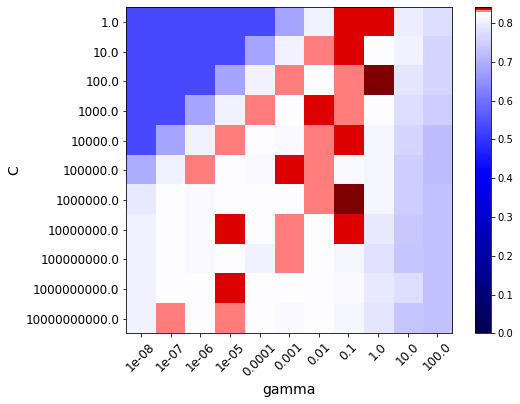

In [18]:
plt.figure(figsize=(8, 6))
plt.imshow(
    test_grid,
    interpolation="nearest",
    cmap=plt.cm.seismic,
    norm=MidpointNormalize(vmin=0, midpoint=0.83),
)
plt.xlabel("gamma", fontsize='14')
plt.ylabel("C", fontsize='14')
plt.tick_params(which='both', labelsize='12')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.show()